<a href="https://colab.research.google.com/github/aravind309/blogs/blob/main/Advanced_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

The term "linearity" in algebra refers to a linear relationship between variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

Scenario taken here is to determine thelinear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. On plotting the independent variable (hours) on the x-axis and dependent variable (percentage) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

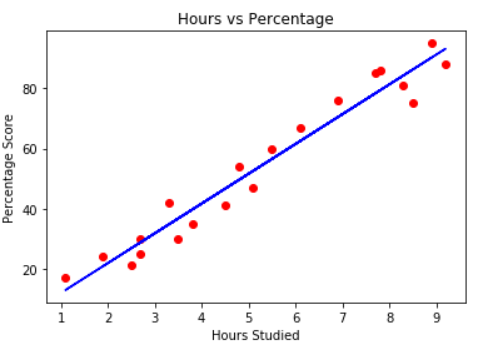



# Importing Libraries

***NumPy*** is used to perform a  variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices.

***Scikit-learn (Sklearn)*** is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

***Pandas*** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

***Matplotlib*** is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. 




In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

Using pandas library we are importing dataset from publicly available google drive link

In [2]:
url = 'https://drive.google.com/file/d/1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path)
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Dataset Exploration

Now let's explore our dataset a bit. We can also see the statiscal data with the help of imported libraries



1.   **Shape of data**  **:**  dataset.shape
2.   **Visualize data**  **:**  dataset.head()
3.   **Statiscal data**  **:**  dataset.describe()







In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plot the dataset**

Let US plot dataset on 2-D graph to eyeball and see if exists any relationship between the data. 

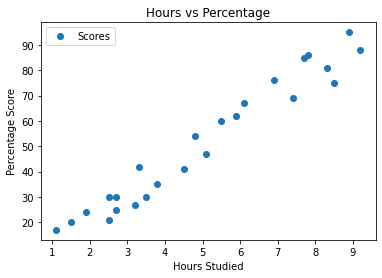

In [6]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Dataset Preperation

First is to divide the data into "attributes" and "labels". Attributes are nothing but the input independent variables and lables are nothing but our dependent output variables which will be predicted. 

Once we have our attributes and data, we divide the entire dataset into train and test dataset.

Input is one column(Hours Studied)

Output is one column(Percentage Score)

We are using train_test_split API to divide our entire dataset into train and test dataset


In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training Model


**Fit train data to Linear Regression curve**

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [8]:

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# Prediction on Test Data

Above trained regression will be used to predict the output on test data. y_pred is a numpy array that containes prediction of test input

In [9]:
y_pred = reg.predict(X_test)
y_pred


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Priting the Linear Regression Cofficients

coef_array of shape (n_features, )
Estimated coefficients for the linear regression problem. In our case we passed one features, so we get one. 

intercept_ It is the Independent term in the linear model. In other words it is the constant number we added to our Input.


In [10]:
print("Weights : ", reg.coef_)

Weights :  [9.91065648]


In [11]:
print(" Intercept : ", reg.intercept_)

 Intercept :  2.018160041434662


# Evaluation Metrics

**Actual vs Precited**

A significant difference between actual and predicted values is expected because the dataset is too small and we didnt tune and default parameters. 

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the Algorithm**

Final step is to evaluate the performance of algorithm. This is to compare how well different algorithms perform on a particular dataset.Below are some of the evaluation metrics are commonly used for regression curves

Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

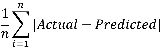

Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

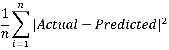


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

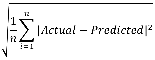

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
